<a href="https://colab.research.google.com/github/kunal-mallick/Data-Science-Assignments/blob/main/Hypothesis%20Testing/Code/Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (5,3)
plt.rcParams['figure.dpi'] = 200

# 4. TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain % of the customer order forms. Any error in order form renders it defective and has to be reworked before processing. The manager wants to check whether the defective % varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences

**Minitab File: Costomer+OrderForm.csv**

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Data-Science-Assignments/main/03_Hypothesis%20Testing/Dataset/Costomer%2BOrderForm.csv')
df.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


## Performing EDA on the given dataset

### Applying Descriptive Statistics

In [14]:
df.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [16]:
df['Phillippines'].value_counts()

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [17]:
df['Indonesia'].value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [18]:
df['Malta'].value_counts()

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [19]:
df['India'].value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

In [20]:
df_array = np.array([[271,267,269,280],[29,33,31,20]])

df_array

array([[271, 267, 269, 280],
       [ 29,  33,  31,  20]])

### Visualizing the Data

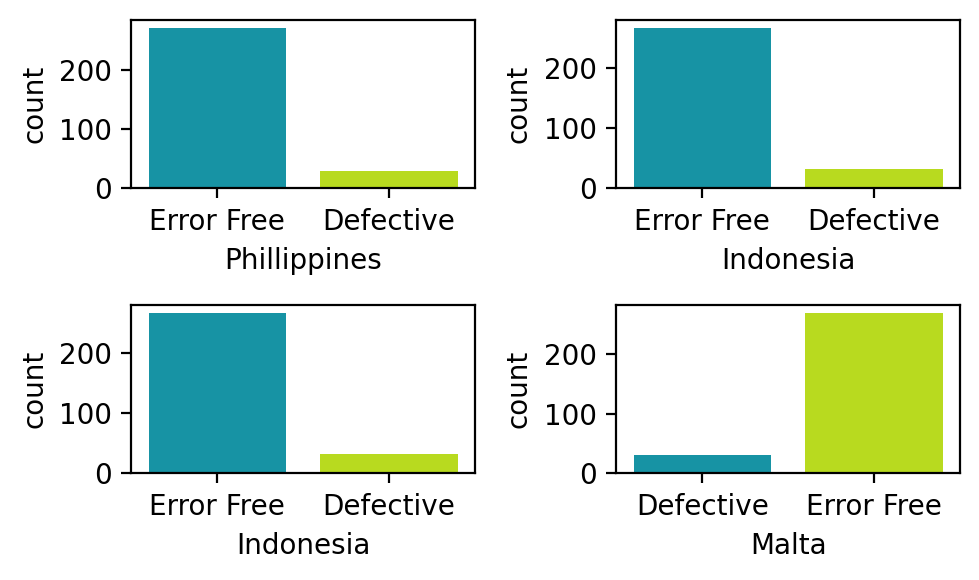

In [21]:
r = 2
c = 2
fig,ax = plt.subplots(r,c)

for i in range(r):
  for j in range(c):
    sns.countplot(df[df.columns[i+j]], ax = ax[i,j], palette="nipy_spectral")

plt.tight_layout()

## Executing Hypothesis Testing

- **H**(o) : All centre have same Defective %.
- **H**(a) : Any one centre have different Defective %.

**Alpha value** : 0.05(*it a 2 tail, Chi-Square test*)

In [22]:
alpha =0.05

stat, pvalue, dof, expected_freq =st.chi2_contingency(df_array)

if pvalue > alpha :
  print("Fail to reject the null hypothesis \n All centre have same Defective %.")
else :
  print("rejecting the null hypothesis\n Any one centre have different Defective %")

Fail to reject the null hypothesis 
 All centre have same Defective %.
